In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [24]:
df=pd.read_csv("advertising.csv")

In [25]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [27]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


I should extract the information of the time stamp to use it

In [43]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format="%Y-%m-%d %H:%M:%S")
df['year'] = pd.DatetimeIndex(df['Timestamp']).year
df['month'] = pd.DatetimeIndex(df['Timestamp']).month
df['day'] = pd.DatetimeIndex(df['Timestamp']).day
df['hour'] = pd.DatetimeIndex(df['Timestamp']).hour
df['minute'] = pd.DatetimeIndex(df['Timestamp']).minute
df['second'] = pd.DatetimeIndex(df['Timestamp']).second
df=df.drop("Timestamp",axis=1)

<AxesSubplot:xlabel='Daily Time Spent on Site'>

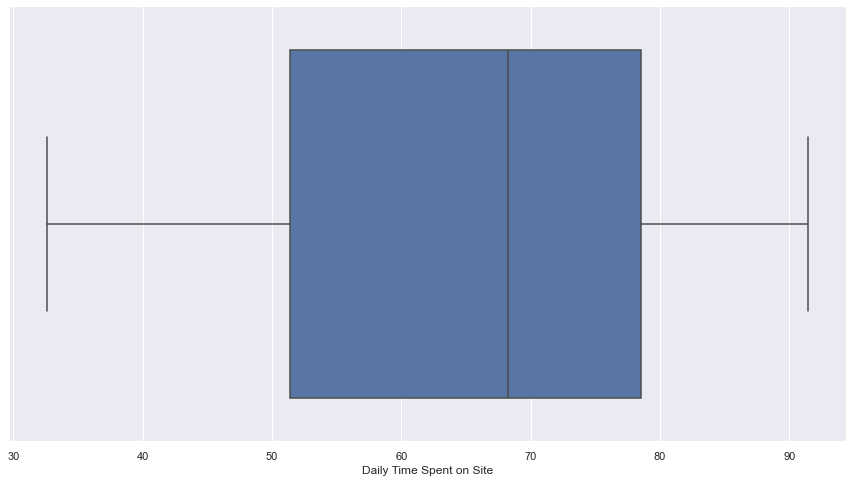

In [40]:
sns.boxplot(x=df["Daily Time Spent on Site"])

most of the people spend about 1 to 1.3 hours in the web site per day considering the minimum of 30 minutes and maximum of almost 1.5 hours 

<AxesSubplot:xlabel='Age'>

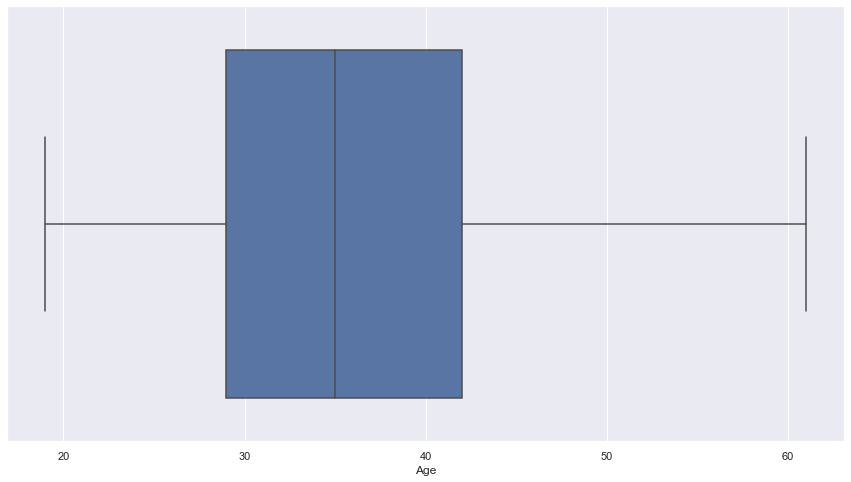

In [41]:
sns.boxplot(x=df["Age"])

So most of the people are 30 to 40

<AxesSubplot:xlabel='Area Income'>

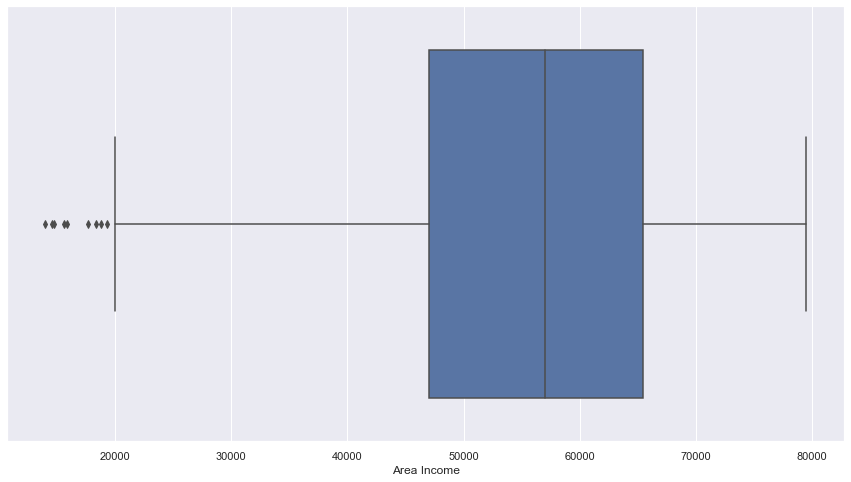

In [42]:
sns.boxplot(x=df["Area Income"])

Most of the poeple earn almost 50k to 70k per day

<AxesSubplot:xlabel='Daily Internet Usage'>

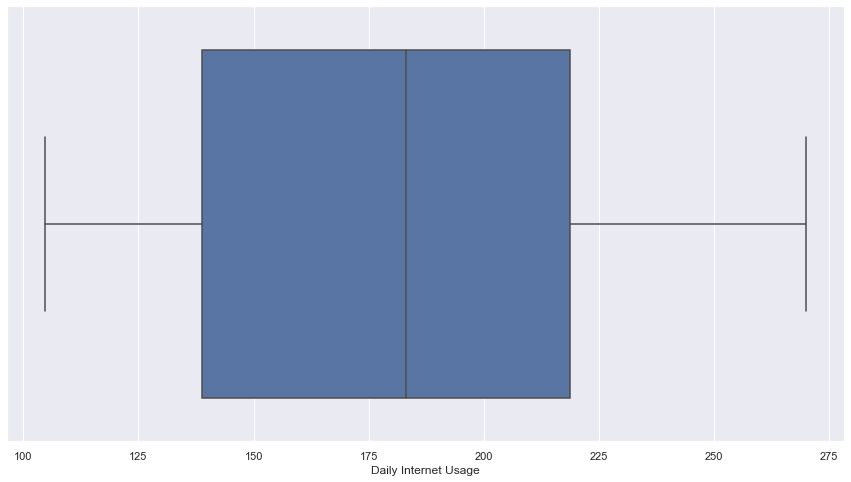

In [39]:
sns.boxplot(x=df["Daily Internet Usage"])

generally, people spend around 2 to over 3 hours

*ad topics would be differant at all so I will skip that*

# What cities contain most of the people in this dataset

In [64]:
df["City"].unique

<bound method Series.unique of 0         Wrightburgh
1           West Jodi
2            Davidton
3      West Terrifurt
4        South Manuel
            ...      
995         Duffystad
996       New Darlene
997     South Jessica
998       West Steven
999       Ronniemouth
Name: City, Length: 1000, dtype: object>

1000 differant cities is not useful

# what is the proportion of men to women

<AxesSubplot:xlabel='Male', ylabel='count'>

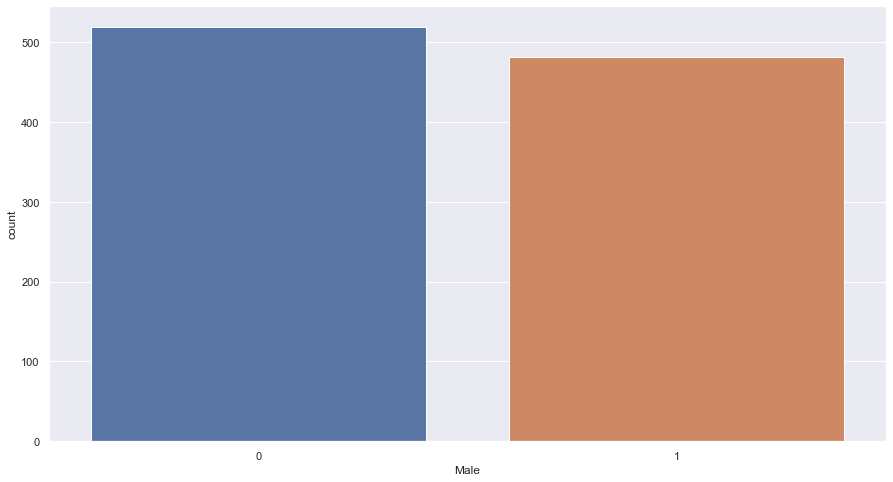

In [51]:
sns.countplot(x=df["Male"])

In [53]:
len(list(df['Country'].unique()))

237

again too many unique values

# How many people did click

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

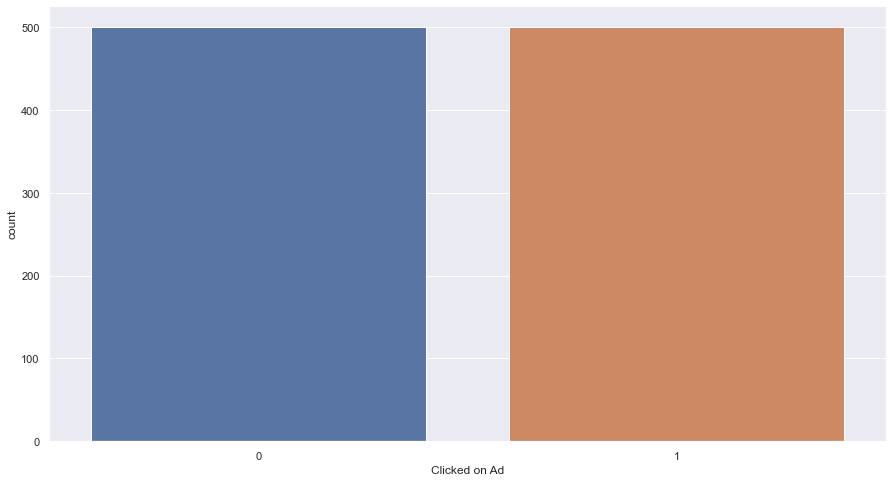

In [59]:
sns.countplot(x=df["Clicked on Ad"])

It is almost equal so it would give good results in the machine learning process

In [67]:
df["year"].unique()

array([2016], dtype=int64)

It just has one attribute which is 2016

<AxesSubplot:xlabel='month', ylabel='Count'>

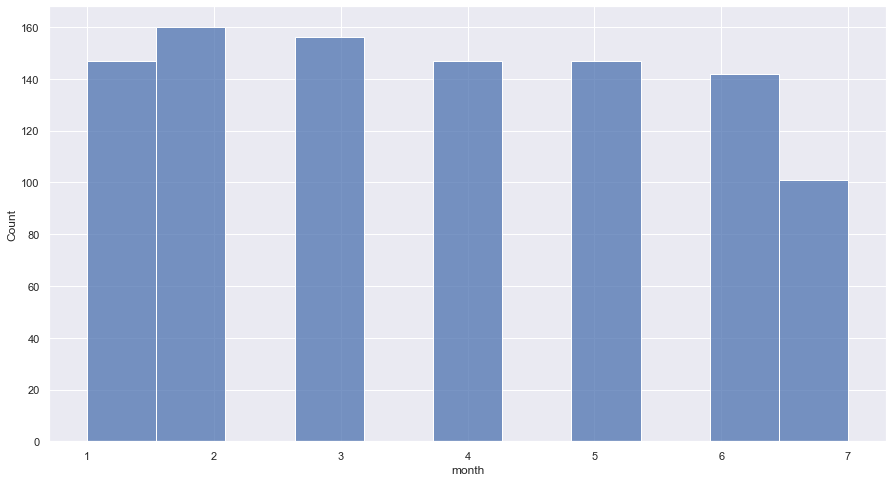

In [69]:
sns.histplot(df["month"])

<AxesSubplot:xlabel='day', ylabel='Count'>

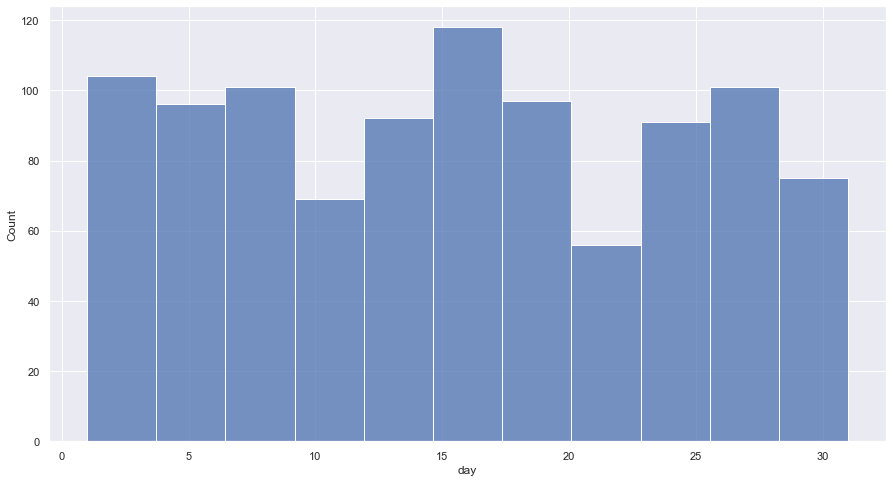

In [70]:
sns.histplot(df["day"])

<AxesSubplot:xlabel='hour', ylabel='Count'>

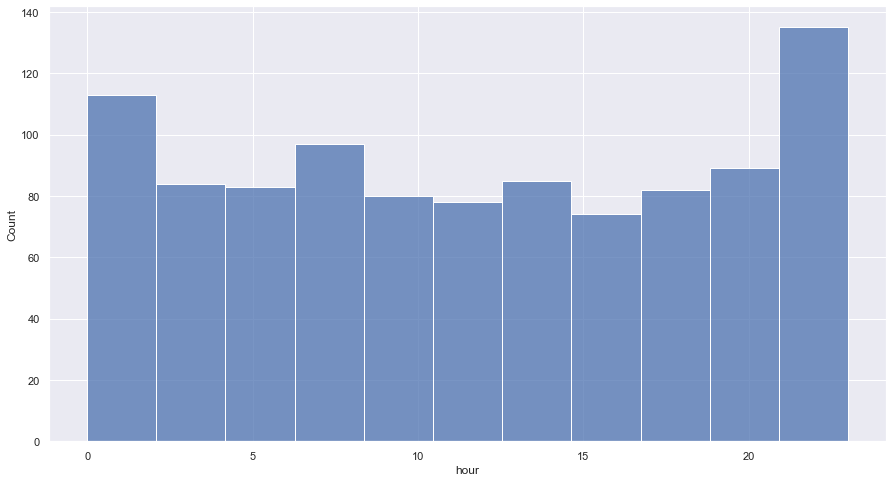

In [68]:
sns.histplot(df["hour"])

it is reasonable because most of the people use internet at nights

# IS there a relation between age and time spent on site

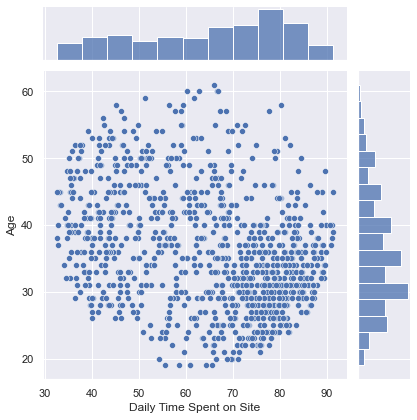

In [73]:
sns.jointplot(x=df["Daily Time Spent on Site"],y=df["Age"])

so as the age goes high the time spent becomes lower and as we get younger we find that most of the people spent more time on the website

# IS there a relation between age and time spent on site

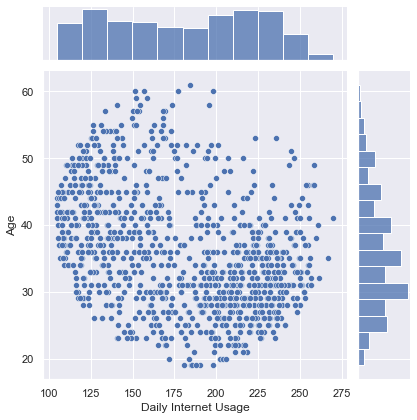

In [74]:
sns.jointplot(x=df["Daily Internet Usage"],y=df["Age"])

this is the reason for the upper plot, as the age goes high people use less inter net and as it comes down the internet usage goes up

# Is there a relation between age and income

<AxesSubplot:xlabel='Age', ylabel='Area Income'>

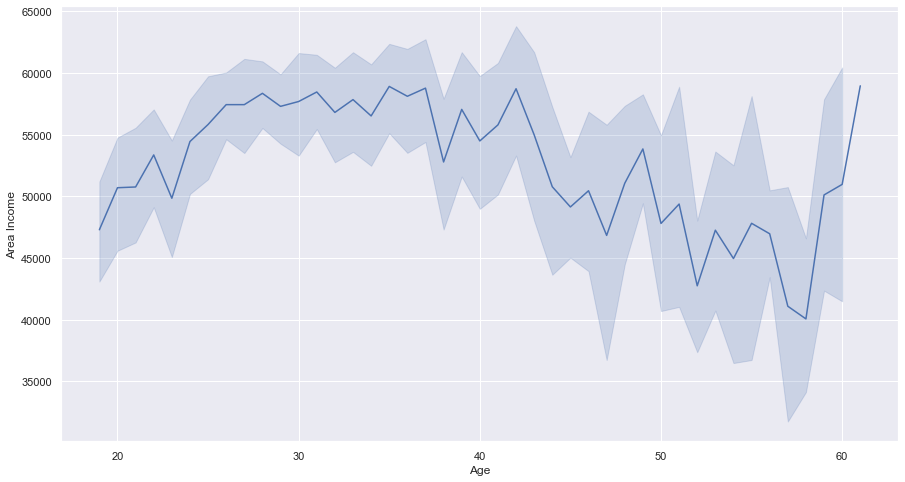

In [76]:
sns.lineplot(x=df["Age"],y=df["Area Income"])

the last point is an outlier considering the shade of noises around it but most of the poeple gain more in their middle age

# Is there a relation between income and time spent on the internet and site

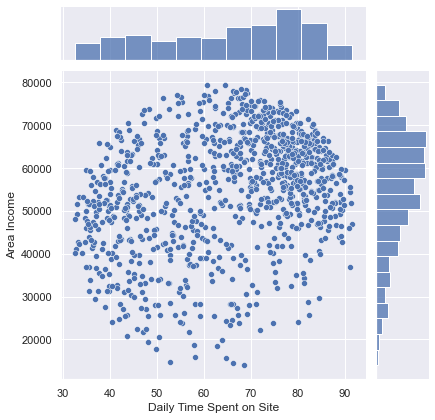

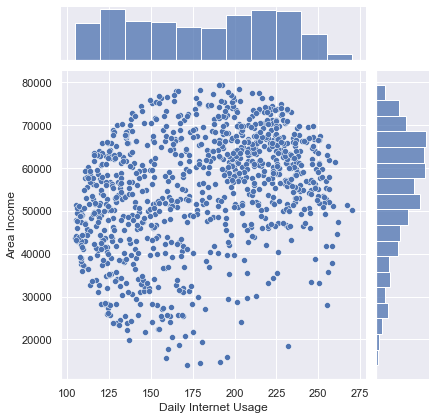

In [82]:
sns.jointplot(x=df["Daily Time Spent on Site"],y=df["Area Income"])
sns.jointplot(x=df["Daily Internet Usage"],y=df["Area Income"])

# Is there a relation between income and gender

<AxesSubplot:xlabel='Male', ylabel='Area Income'>

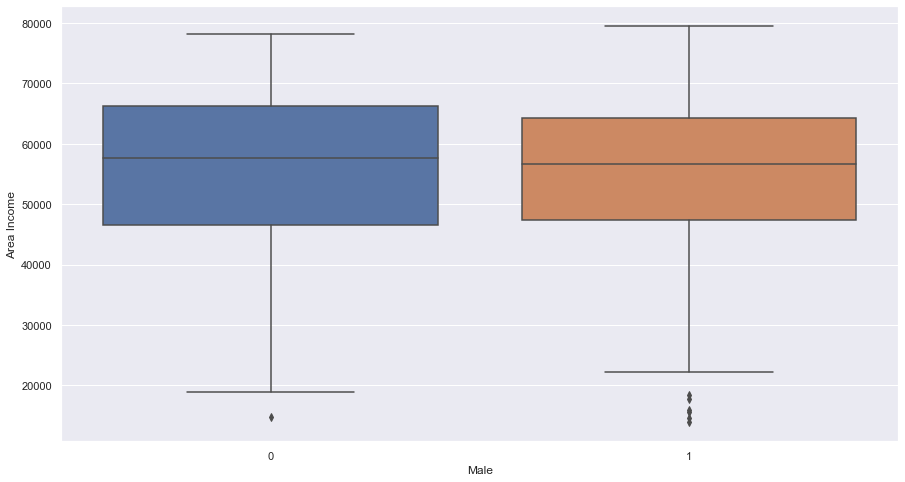

In [83]:
sns.boxplot(x=df["Male"],y=df["Area Income"])

Women earn more than men

<AxesSubplot:xlabel='Clicked on Ad', ylabel='Area Income'>

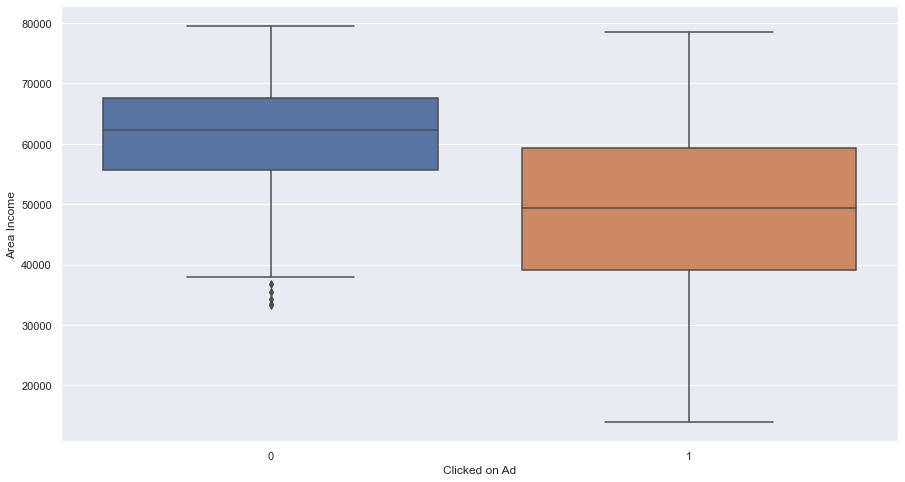

In [84]:
sns.boxplot(x=df["Clicked on Ad"],y=df["Area Income"])

those who clicked have less income than the those who did not

<AxesSubplot:>

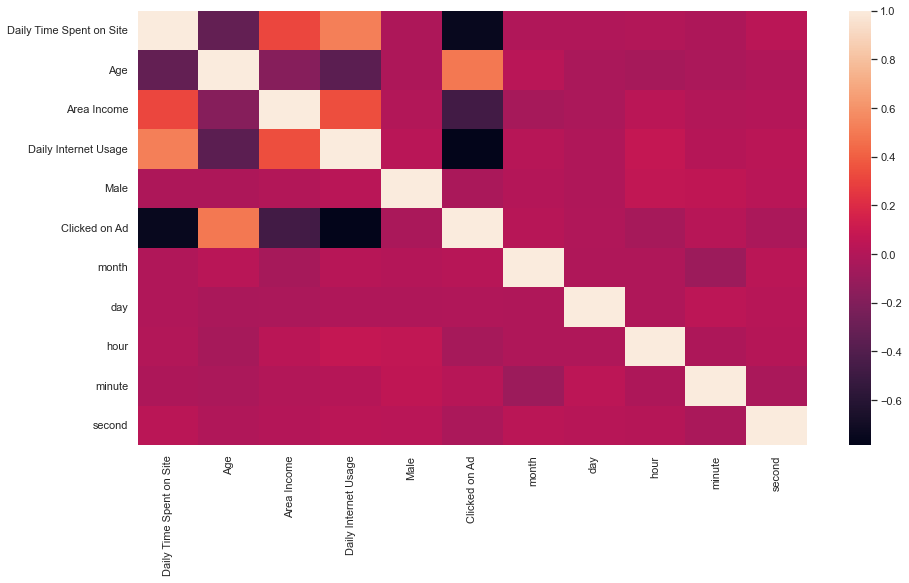

In [86]:
sns.heatmap(df.drop("year",axis=1).corr())

# What is the internet usage of men vs women

<AxesSubplot:xlabel='Male', ylabel='Daily Internet Usage'>

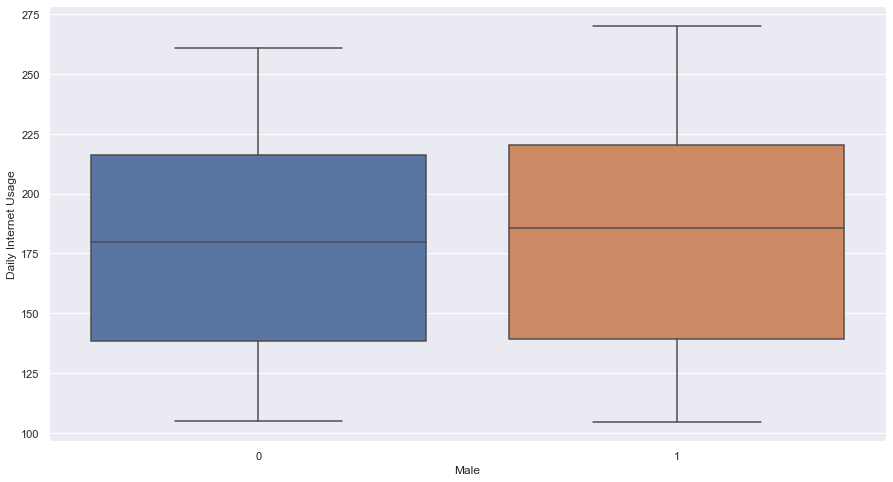

In [87]:
sns.boxplot(x=df["Male"],y=df["Daily Internet Usage"])